# I. Information

## Assignment Group
- Linxia Liu (Student ID: 91714380)
- Sneha Lakshmikanthaiah (Student ID: 37889217)
- Vivian Kang (Student ID: 66723308)
- Yuan Liu (Student ID: 67529164)
- Zelong Qian (Student ID: 54954268)

## People I discussed with
- Teng-yun (Jacob) Chung
- Kuang (Steven) Li
- Takako (Tako) Suzuki

# II. Group Assignment (100 points):

## Instructions:
This group assignment has two questions:

## Question 1 (50 points):
- Visit https://www.indeed.com/m/ website and search for Data Scientist in Los Angles. Now click on the “Find Jobs” button and you will be able to see the search results. Please find the top 200 jobs and obtain the frequencies of jobs that mention C, C++, Java, Javascript, Python, R, SQL, Hadoop, Hive, Pig, Spark, AWS and Tableau, respectively.
- Bonus question (10 points): compare the skill frequencies for Data Science jobs in San Francisco, Los Angeles, New York, Boston, Chicago, Austin and DC.

In [394]:
# Import the necessary packages
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import re
import pandas as pd
import requests
import time

### 1. Skill frequencies of top-200 data scientist jobs in LA

In [395]:
# Testing the for loop to ensure that page switching is working
# In total, 200 jobs are obtained from web
lst = []
url = "https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=0"
for i in range(20):
    
    page = urlopen(url)
    time.sleep(3)
    soup = BeautifulSoup(page, 'lxml')
    all_matches = soup.findAll(name = 'h2', attrs = {'class':['jobTitle']})
    for each in all_matches:
        print(each.a['href'])
        lst.append(each.a['href'])
    
    print(url)
    print(len(lst))
    url = 'https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=' + str((i+1)*10)

viewjob?jk=1544ab41b4dc02b6
viewjob?jk=f934053f9fe92002
viewjob?jk=62dc47ed846b673e
viewjob?jk=d3b546ac10f53697
viewjob?jk=0ee0ae6ba0ed34f5
viewjob?jk=f6576c3ba5851dbb
viewjob?jk=6a6ff0c126941898
viewjob?jk=4d807d29d853782a
viewjob?jk=813cbe25db81910c
viewjob?jk=a1faab394888c6cd
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=0
10
viewjob?jk=34daff62bfb450bd
viewjob?jk=6a6ff0c126941898
viewjob?jk=451d04bfb6ce88fe
viewjob?jk=07d4ed2f644971ad
viewjob?jk=74463ea550f38af8
viewjob?jk=4f8df9ddc6e2aa93
viewjob?jk=293164549f370d1d
viewjob?jk=71328b18251c983e
viewjob?jk=c3034272f6cbc073
viewjob?jk=7ac2a6dd1ffca117
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=10
20
viewjob?jk=ba7f15339dac5d96
viewjob?jk=c3034272f6cbc073
viewjob?jk=07d4ed2f644971ad
viewjob?jk=2efe40d815e4bd1f
viewjob?jk=4f8df9ddc6e2aa93
viewjob?jk=7bd3fdd239a531cd
viewjob?jk=77439bf7fef5b438
viewjob?jk=34daff62bfb450bd
viewjob?jk=5e76b05b198860b3
viewjob?jk=141016bda21cb7a8
https://www.ind

In [396]:
# Build up for loops to obtain the required information from web
# Page changing function is added, and the progress is tracked 
title = []
company = []
location = []
jd = []
lst = []
url = "https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=0"
for i in range(20):
    
    page = urlopen(url)
    time.sleep(5)
    soup = BeautifulSoup(page, 'lxml')
    all_matches = soup.findAll(name = 'h2', attrs = {'class':['jobTitle']})
    for each in all_matches:
        jd_url = 'http://www.indeed.com/m/'+ each.a['href']
        lst.append(each.a['href'])
        jd_page = urlopen(jd_url)
        jd_soup = BeautifulSoup(jd_page, 'lxml')
        jd_desc = jd_soup.findAll(attrs = {'id':['desc']})
        title.append(jd_soup.body.p.b.font.text)
        company.append(jd_desc[0].span.text)
        location.append(jd_soup.body.p.span.text)
        jd.append(jd_desc[0].text)
        
  
    print(url)
    print(len(lst))
    url = 'https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=' + str((i+1)*10)

https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=0
10
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=10
20
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=20
30
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=30
40
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=40
50
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=50
60
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=60
70
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=70
80
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=80
90
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=90
100
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=100
110
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=110
120
https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=120
130
https://www.indeed.com/m/jobs?q=data+scientis

In [397]:
# Convert the information into a dataframe for further analysis
job = {'title': title,
         'company': company,
         'location': location,
         'Description': jd}
df = pd.DataFrame.from_dict(job)

In [398]:
# Visualize the dataframe
df

,title,company,location,Description
0,Data Scientist,Deloitte,"Los Angeles, CA 90013",Deloitte Services LP includes internal support...
1,Data Scientist,AvantStay,"Los Angeles, CA","Who we are...\nAvantStay delivers exceptional,..."
2,Data Scientist I - (Part-time),"Columbus Technologies and Services, Inc.","Pasadena, CA 91101",Must be a US Citizen\nEstimated duration of 12...
3,Data Scientist,Age of Learning,"Glendale, CA 91203",Company Overview:\nAge of Learning is a leadin...
4,Data Scientist,GOAT,"Los Angeles, CA","With over 20 million members, GOAT is the worl..."
...,...,...,...,...
195,Machine Learning Engineer,Oben,"Pasadena, CA",As a member of the machine language translatio...
196,Sr. Data Analyst,Honk,"Los Angeles, CA 90064",HONK is a fast growing technology company disr...
197,"VP, Data Science, Business Intelligence & Data...",NBCUniversal,"Universal City, CA",Role Summary:\nNBC Entertainment Digital is lo...
198,"Data Analyst - Health, Senior",Blue Shield of California,"Monterey Park, CA",GENERAL SUMMARY:\n\nWe are hiring for a Senior...


In [399]:
# Save the dataframe as .csv file to keep input source for analysis consistent
export_csv = df.to_csv (r'export_dataframe_10302019.csv', index = None, header = True)

In [400]:
# C
# We dont include C+, C++, and C# in the searching for C 
feqC = df.Description.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum()
feqC

41

In [401]:
# C++
# df.Description.str.contains(r'[Cc]\+\+')
feqC_plusplus = df.Description.str.contains(r'\b[Cc]\+\+').sum()
feqC_plusplus

31

In [402]:
# Java
feqJava = df.Description.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum()
feqJava

49

In [403]:
# Javascript
feqJS = df.Description.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum()
feqJS

5

In [404]:
# Python
# We assume ipython is an interacitve shell instead of a programming language, therefore it is not included here
feqPython = df.Description.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum()
feqPython

148

In [405]:
# R
feqR = df.Description.str.contains(r'\b[Rr]\b').sum()
feqR

100

In [406]:
# SQL
# We consider MySQL or SQLite as part of SQL, therefore '\b' is not used
feqSQL = df.Description.str.contains(r'[Ss][Qq][Ll]|[Ss]tructured\s[Qq]uery\s[Ll]anguage').sum()
feqSQL

119

In [407]:
# Hadoop
feqHadoop = df.Description.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum()
feqHadoop

34

In [408]:
# Hive
feqHive = df.Description.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum()
feqHive

13

In [409]:
# Pig
feqPig = df.Description.str.contains(r'\b[Pp][Ii][Gg]\b').sum()
feqPig

3

In [410]:
# Spark
feqSpark = df.Description.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum()
feqSpark

40

In [411]:
# AWS
feqAWS = df.Description.str.contains(r'\b[Aa][Ww][Ss]\b|[Aa]mazon\s[Ww]eb\s[Ss]ervices').sum()
feqAWS

40

In [412]:
# Tableau
feqTableau = df.Description.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum()
feqTableau

50

In [413]:
skill = ['C', 'C++', 'Java', 'Javascript', 'Python', 'R', 'SQL', 'Hadoop', 'Hive', 'Pig', 'Spark', 'AWS', 'Tableau']
frequency = [feqC, feqC_plusplus, feqJava, feqJS, feqPython, feqR, feqSQL, feqHadoop, feqHive, feqPig, feqSpark, feqAWS, feqTableau]

In [414]:
skills = {'Skill': skill,
         'Frequency': frequency}
df_skills = pd.DataFrame.from_dict(skills)

In [415]:
# Present the results in table format
df_skills

,Skill,Frequency
0,C,41
1,C++,31
2,Java,49
3,Javascript,5
4,Python,148
5,R,100
6,SQL,119
7,Hadoop,34
8,Hive,13
9,Pig,3


<function matplotlib.pyplot.show(*args, **kw)>

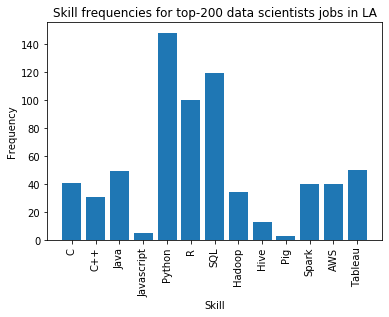

In [416]:
# Present the results in bar plot
import matplotlib.pyplot as plt

plt.bar(df_skills.Skill, df_skills.Frequency, align = 'center')
plt.xticks(rotation = 90)
plt.title('Skill frequencies for top-200 data scientists jobs in LA')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.show

### 2. Bonus question (10 points): Compare Skill frequencies of top-200 data scientist jobs in San Francisco, Los Angeles, New York, Boston, Chicago, Austin and DC

In [417]:
city_set = [
    'San+Francisco',
    'Los+Angeles', 
    'New+York', 
    'Boston', 
    'Chicago', 
    'Austin', 
    'DC']

In [422]:
cities = []
title = []
company = []
jd = []
lst = []
for city in city_set:
    
    url = 'https://www.indeed.com/m/jobs?q=data+scientist&l=' + str(city) + '&start=0'
    print(city)
    
    for i in range(20):
        
        page = urlopen(url)
        time.sleep(1)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(name = 'h2', attrs = {'class':['jobTitle']})
        for each in all_matches:
            jd_url= 'http://www.indeed.com/m/'+ each.a['href']
            lst.append(each.a['href'])
            jd_page =urlopen(jd_url)
            jd_soup = BeautifulSoup(jd_page, 'lxml')
            jd_desc = jd_soup.findAll(attrs={'id':['desc']})
            cities.append(city)
            title.append(jd_soup.body.p.b.font.text)
            company.append(jd_desc[0].span.text)
            jd.append(jd_desc[0].text)
        
        print(url)
        print(len(lst))
        url = 'https://www.indeed.com/m/jobs?q=data+scientist&l=' + str(city) + "&start=" + str((i+1)*10)

San+Francisco
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=0
10
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=10
20
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=20
30
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=30
40
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=40
50
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=50
60
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=60
70
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=70
80
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=80
90
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=90
100
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=100
110
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=110
120
https://www.indeed.com/m/jobs?q=data+scientist&l=San+Francisco&start=120
130
https

https://www.indeed.com/m/jobs?q=data+scientist&l=Austin&start=130
1140
https://www.indeed.com/m/jobs?q=data+scientist&l=Austin&start=140
1150
https://www.indeed.com/m/jobs?q=data+scientist&l=Austin&start=150
1160
https://www.indeed.com/m/jobs?q=data+scientist&l=Austin&start=160
1170
https://www.indeed.com/m/jobs?q=data+scientist&l=Austin&start=170
1177
https://www.indeed.com/m/jobs?q=data+scientist&l=Austin&start=180
1187
https://www.indeed.com/m/jobs?q=data+scientist&l=Austin&start=190
1197
DC
https://www.indeed.com/m/jobs?q=data+scientist&l=DC&start=0
1207
https://www.indeed.com/m/jobs?q=data+scientist&l=DC&start=10
1217
https://www.indeed.com/m/jobs?q=data+scientist&l=DC&start=20
1227
https://www.indeed.com/m/jobs?q=data+scientist&l=DC&start=30
1237
https://www.indeed.com/m/jobs?q=data+scientist&l=DC&start=40
1247
https://www.indeed.com/m/jobs?q=data+scientist&l=DC&start=50
1257
https://www.indeed.com/m/jobs?q=data+scientist&l=DC&start=60
1267
https://www.indeed.com/m/jobs?q=data+sc

In [423]:
job_city = {'city': cities, 'title': title, 'company': company, 'description': jd}
df_city = pd.DataFrame.from_dict(job_city)

In [424]:
df_city

,city,title,company,description
0,San+Francisco,Data Scientist,Blue Owl,A million people a year die in car collisions ...
1,San+Francisco,Data Scientist,States Title Holding,Create the model that transforms how real esta...
2,San+Francisco,Data Scientist (Jr. to Sr. Level),Zachary Piper Solutions,Piper Companies is currently looking for Data ...
3,San+Francisco,Data Scientist,Gap Inc.,About Gap Inc.\nOur past is full of iconic mom...
4,San+Francisco,Data Scientist,Spin Electric Scooters,About Spin\n\nSpin operates electric scooters ...
...,...,...,...,...
1392,DC,Data Scientist - Data Analyst,Guidehouse,Overview\nInterested in working with talented ...
1393,DC,Chief Data Scientist,BAE Systems,The Chief Data Scientist (CDS) shall have hand...
1394,DC,Senior Operations Data Analyst,Applied Insight,"Overview\nAt Applied Insight, we leave no ston..."
1395,DC,Data Scientist,Xometry Inc,Xometry is a rapidly growing startup that is t...


In [425]:
export_csv = df_city.to_csv (r'export_dataframe_city_10302019.csv', index = None, header = True)

In [426]:
df_city_group = df_city.groupby('city')

In [427]:
C = []
C_plusplus = []
Java = []
JS = []
Python = []
R = []
SQL = []
Hadoop = []
Hive = []
Pig = []
Spark = []
AWS = []
Tableau = []

for city in city_set:
    C.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Cc](?<!\+)\b|\b[Cc](?<!\#)\b').sum())
    C_plusplus.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Cc]\+\+').sum())
    Java.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Jj][Aa][Vv][Aa]\b').sum())
    JS.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Jj][Aa][Vv][Aa][Ss][Cc][Rr][Ii][Pp][Tt]\b').sum())
    Python.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Pp][Yy][Tt][Hh][Oo][Nn]\b').sum())
    R.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Rr]\b').sum())
    SQL.append(df_city_group.get_group(str(city)).description.str.contains(r'[Ss][Qq][Ll]|[Ss]tructured\s[Qq]uery\s[Ll]anguage').sum())
    Hadoop.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Hh][Aa][Dd][Oo][Oo][Pp]\b').sum())
    Hive.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Hh][Ii][Vv][Ee]\b').sum())
    Pig.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Pp][Ii][Gg]\b').sum())
    Spark.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Ss][Pp][Aa][Rr][Kk]\b').sum())
    AWS.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Aa][Ww][Ss]\b|[Aa]mazon\s[Ww]eb\s[Ss]ervices').sum())
    Tableau.append(df_city_group.get_group(str(city)).description.str.contains(r'\b[Tt][Aa][Bb][Ll][Ee][Aa][Uu]').sum())

In [428]:
skills_city = {'city': city_set, 
               'C': C, 
               'C_plusplus': C_plusplus, 
               'Java': Java,
               'Javascript': JS, 
               'Python': Python, 
               'R': R, 
               'SQL': SQL, 
               'Hadoop': Hadoop, 
               'Hive': Hive, 
               'Pig': Pig, 
               'Spark': Spark, 
               'AWS': AWS, 
               'Tableau': Tableau}
df_skills_city = pd.DataFrame.from_dict(skills_city)

In [429]:
# Present the results in table format
df_skills_city

,city,C,C_plusplus,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau
0,San+Francisco,25,18,36,5,147,99,115,39,31,7,52,26,25
1,Los+Angeles,40,32,43,4,147,106,127,30,12,2,35,39,52
2,New+York,21,16,40,14,166,117,121,38,22,7,48,30,39
3,Boston,36,25,32,6,142,104,89,22,12,2,29,30,34
4,Chicago,41,30,25,9,154,123,104,46,17,5,43,43,40
5,Austin,70,60,64,15,129,83,107,41,34,9,65,58,32
6,DC,42,21,37,9,131,104,101,16,15,9,27,48,48


<function matplotlib.pyplot.show(*args, **kw)>

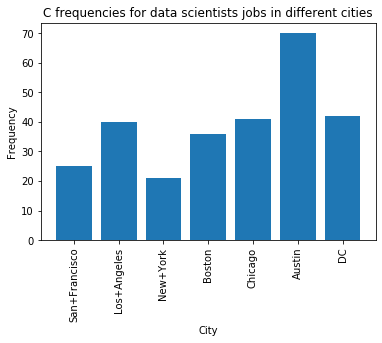

In [430]:
# Present the results in bar plot
# C
plt.bar(df_skills_city.city, df_skills_city.C, align = 'center')
plt.xticks(rotation = 90)
plt.title('C frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

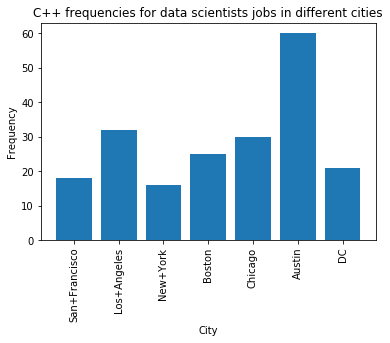

In [431]:
# C++
plt.bar(df_skills_city.city, df_skills_city.C_plusplus, align = 'center')
plt.xticks(rotation = 90)
plt.title('C++ frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

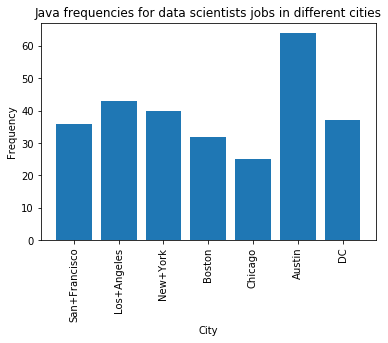

In [432]:
# Java
plt.bar(df_skills_city.city, df_skills_city.Java, align = 'center')
plt.xticks(rotation = 90)
plt.title('Java frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

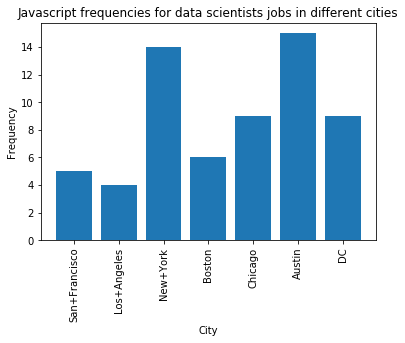

In [433]:
#Javascript
plt.bar(df_skills_city.city, df_skills_city.Javascript, align = 'center')
plt.xticks(rotation = 90)
plt.title('Javascript frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

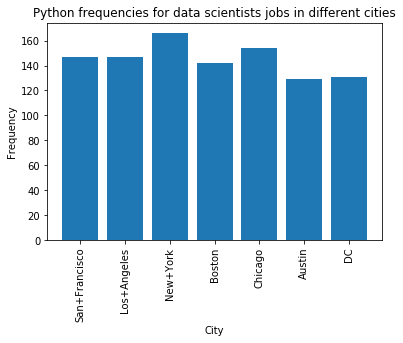

In [434]:
# Python
plt.bar(df_skills_city.city, df_skills_city.Python, align = 'center')
plt.xticks(rotation = 90)
plt.title('Python frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

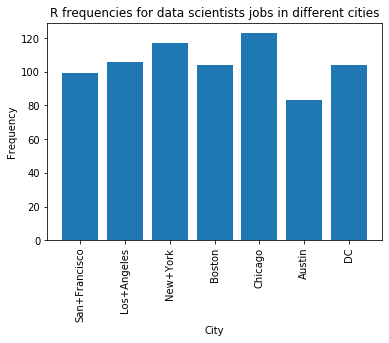

In [435]:
# R
plt.bar(df_skills_city.city, df_skills_city.R, align = 'center')
plt.xticks(rotation = 90)
plt.title('R frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

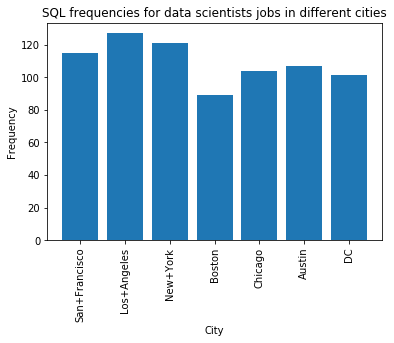

In [436]:
# SQL
plt.bar(df_skills_city.city, df_skills_city.SQL, align = 'center')
plt.xticks(rotation = 90)
plt.title('SQL frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

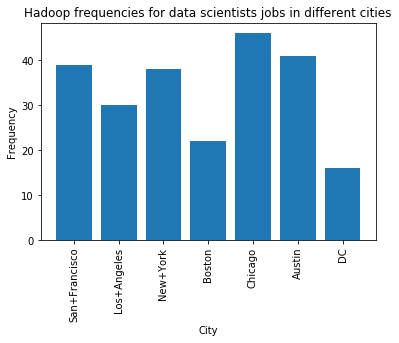

In [437]:
# Hadoop
plt.bar(df_skills_city.city, df_skills_city.Hadoop, align = 'center')
plt.xticks(rotation = 90)
plt.title('Hadoop frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

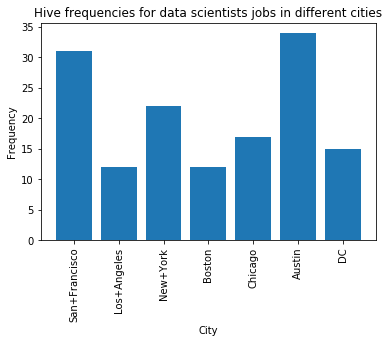

In [438]:
# Hive
plt.bar(df_skills_city.city, df_skills_city.Hive, align = 'center')
plt.xticks(rotation = 90)
plt.title('Hive frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

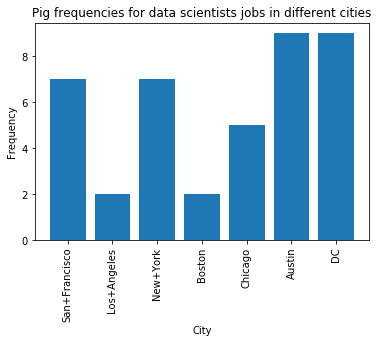

In [439]:
# Pig
plt.bar(df_skills_city.city, df_skills_city.Pig, align = 'center')
plt.xticks(rotation = 90)
plt.title('Pig frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

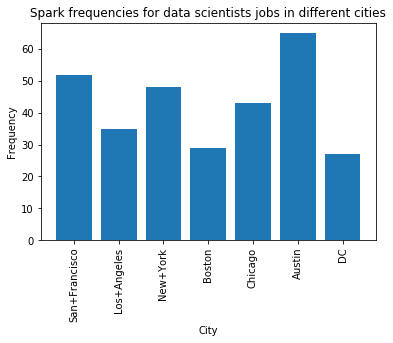

In [440]:
# Spark
plt.bar(df_skills_city.city, df_skills_city.Spark, align = 'center')
plt.xticks(rotation = 90)
plt.title('Spark frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

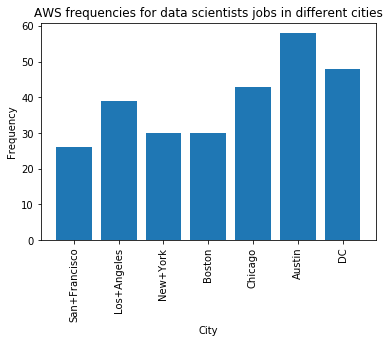

In [441]:
# AWS
plt.bar(df_skills_city.city, df_skills_city.AWS, align = 'center')
plt.xticks(rotation = 90)
plt.title('AWS frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

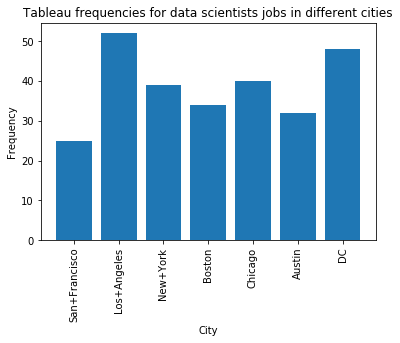

In [442]:
# Tableau
plt.bar(df_skills_city.city, df_skills_city.Tableau, align = 'center')
plt.xticks(rotation = 90)
plt.title('Tableau frequencies for data scientists jobs in different cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show

## Question 2 (50 points):
Choose one of the following two tasks:

A. Visit https://www.indeed.com/Top-Rated-Workplaces, and search for Data Scientist in Los Angeles. Scrape 50 company reviews of the first 50 companies (if fewer than 50, just get the companies names on the first page). Retrieve the company’s name, title of the reviewer, the date of the review, the title, rating, review content, pros, and cons and the review. The output can to be shown in the form of a table. 

If any of the companies doesn’t have 50 reviews, then you just need to get whatever it has on the website.

In [443]:
# Only 49 compnaies are found in the searching for data scientist in LA using the given website

comp_name = []

url = "https://www.indeed.com/cmp?q=Data+Scientist&l=Los+Angeles&from=discovery-cmp-search"
page = urlopen(url)
time.sleep(1)
soup = BeautifulSoup(page, 'lxml')
all_matches = soup.findAll(name = 'a', attrs = {'class':['cmp-CompanyWidget-name']})
for cmp in all_matches:
    comp_name.append(cmp.text)
print(len(comp_name))

49


In [447]:
comp_name = []
rev_title = []
rev_date = []
title = []
rating = []
rev_cnt = []
pros = []
cons = []

url = "https://www.indeed.com/cmp?q=Data+Scientist&l=Los+Angeles&from=discovery-cmp-search"

page = urlopen(url)
time.sleep(1)
soup = BeautifulSoup(page, 'lxml')
all_matches = soup.findAll(name = 'a', attrs = {'class':'cmp-CompanyWidget-name'})

    
for each in all_matches:
    rev_url = 'https://www.indeed.com' + each['href'] + '/reviews'
    
    for i in range(3):

        rev_page = urlopen(rev_url)
        time.sleep(1)
        rev_soup = BeautifulSoup(rev_page, 'lxml')
        rev_matches = rev_soup.findAll(name = 'div', attrs = {'class':'cmp-review-container'})
        
        for container in rev_matches:
            comp_name.append(rev_soup.find(name = 'div', attrs = {'itemprop':'name'}).text)
            
            for a in container.findAll(name = 'div', attrs = {'class':'cmp-review-title'}):
                if a == None:
                    rev_title.append('n/a')
                else:
                    rev_title.append(a.span.text)
                    
            for b in container.findAll(name = 'span', attrs = {'class':'cmp-review-date-created'}):
                if b == None:
                    rev_date.append('n/a')
                else:
                    rev_date.append(b.text)
                    
            for c in container.findAll(name = 'span', attrs = {'class':'cmp-reviewer'}):
                if c == None:
                    title.append('n/a')
                else:
                    title.append(c.text)
                    
            for e in container.findAll(name = 'div', attrs = {'class':'cmp-ratingNumber'}):
                if e == None:
                    rating.append('n/a')
                else:
                    rating.append(e.text)
                    
            for f in container.findAll(name = 'span', attrs = {'itemprop':'reviewBody'}):
                if f == None:
                    rev_cnt.append('n/a')
                else:
                    rev_cnt.append(f.text)
                    
            if not container.find(name = 'div', attrs = {'class':'cmp-review-pro-text'}):
                pros.append('n/a')
            else:
                pros.append(container.find(name = 'div', attrs = {'class':'cmp-review-pro-text'}).text)
                
            if not container.find(name = 'div', attrs = {'class':'cmp-review-con-text'}):
                cons.append('n/a')
            else:
                cons.append(container.find(name = 'div', attrs = {'class':'cmp-review-con-text'}).text)

        print(rev_url)
        rev_url = 'https://www.indeed.com' + each['href'] + '/reviews?start=' + str((i+1)*20)

https://www.indeed.com/cmp/Veritone/reviews
https://www.indeed.com/cmp/Veritone/reviews?start=20
https://www.indeed.com/cmp/Veritone/reviews?start=40
https://www.indeed.com/cmp/Hulu/reviews
https://www.indeed.com/cmp/Hulu/reviews?start=20
https://www.indeed.com/cmp/Hulu/reviews?start=40
https://www.indeed.com/cmp/Deloitte/reviews
https://www.indeed.com/cmp/Deloitte/reviews?start=20
https://www.indeed.com/cmp/Deloitte/reviews?start=40
https://www.indeed.com/cmp/City-National-Bank/reviews
https://www.indeed.com/cmp/City-National-Bank/reviews?start=20
https://www.indeed.com/cmp/City-National-Bank/reviews?start=40
https://www.indeed.com/cmp/University-of-California-Los-Angeles/reviews
https://www.indeed.com/cmp/University-of-California-Los-Angeles/reviews?start=20
https://www.indeed.com/cmp/University-of-California-Los-Angeles/reviews?start=40
https://www.indeed.com/cmp/Zs-Associates/reviews
https://www.indeed.com/cmp/Zs-Associates/reviews?start=20
https://www.indeed.com/cmp/Zs-Associates/

In [448]:
df_comp = {'Company': comp_name, 
              'Reviewer_title': title, 
              'Date': rev_date, 
              'Review_title': rev_title, 
              'Rating': rating, 
              'Review': rev_cnt, 
              'Pros': pros, 
              'Cons': cons}
df_company = pd.DataFrame.from_dict(df_comp)

In [449]:
df_company

,Company,Reviewer_title,Date,Review_title,Rating,Review,Pros,Cons
0,Veritone,Hopefully not randomly laid-off soon,"January 7, 2018","Has potential, but job stability is always in ...",3.0,Too many parts moving at the same time with un...,Cool new industry,Random unexplained lay-offs
1,Veritone,Software Engineer,"June 24, 2019","Great people, but planning leaves something to...",3.0,- Relaxed work hours where most managers don't...,n/a,n/a
2,Veritone,Data Scientist Intern,"January 2, 2019",Good company with creative atomsphere,5.0,A company offers good atmosphere at creative t...,n/a,n/a
3,Veritone,Director New Business Development,"October 2, 2017",Start up company with amazing AI promise,3.0,Great AI resources coming out of this soon to ...,Cutting edge company,Start ups usual challenges
4,Veritone,Hopefully not randomly laid-off soon,"January 7, 2018","Has potential, but job stability is always in ...",3.0,Too many parts moving at the same time with un...,Cool new industry,Random unexplained lay-offs
...,...,...,...,...,...,...,...,...
1913,Infosys,Functional Consultant,"September 12, 2019",Productive & fun place,4.0,Good for learning but felt lost in the crowd. ...,n/a,n/a
1914,Infosys,Senior Systems Engineer,"September 11, 2019",Compensation is not fair.,1.0,Compensation doesn't match with the market at ...,n/a,n/a
1915,Penn Schoen Berland,Surveyor,"June 11, 2019",Fun work environment,4.0,Typical day included calling out of state to d...,n/a,n/a
1916,Penn Schoen Berland,International Politics Intern,"August 5, 2015",Pretty young and hip workplace,5.0,Most of the people I worked with were younger ...,n/a,n/a


In [450]:
df_company_cleaned = df_company.drop_duplicates(subset = ['Reviewer_title', 'Review_title', 'Date', 'Rating'], keep = 'first') 
df_company_cleaned

,Company,Reviewer_title,Date,Review_title,Rating,Review,Pros,Cons
0,Veritone,Hopefully not randomly laid-off soon,"January 7, 2018","Has potential, but job stability is always in ...",3.0,Too many parts moving at the same time with un...,Cool new industry,Random unexplained lay-offs
1,Veritone,Software Engineer,"June 24, 2019","Great people, but planning leaves something to...",3.0,- Relaxed work hours where most managers don't...,n/a,n/a
2,Veritone,Data Scientist Intern,"January 2, 2019",Good company with creative atomsphere,5.0,A company offers good atmosphere at creative t...,n/a,n/a
3,Veritone,Director New Business Development,"October 2, 2017",Start up company with amazing AI promise,3.0,Great AI resources coming out of this soon to ...,Cutting edge company,Start ups usual challenges
8,Hulu,Viewer Experience Advocate,"October 25, 2019",It's okay,3.0,I loved working here in the beginning. Once th...,n/a,n/a
...,...,...,...,...,...,...,...,...
1913,Infosys,Functional Consultant,"September 12, 2019",Productive & fun place,4.0,Good for learning but felt lost in the crowd. ...,n/a,n/a
1914,Infosys,Senior Systems Engineer,"September 11, 2019",Compensation is not fair.,1.0,Compensation doesn't match with the market at ...,n/a,n/a
1915,Penn Schoen Berland,Surveyor,"June 11, 2019",Fun work environment,4.0,Typical day included calling out of state to d...,n/a,n/a
1916,Penn Schoen Berland,International Politics Intern,"August 5, 2015",Pretty young and hip workplace,5.0,Most of the people I worked with were younger ...,n/a,n/a


In [451]:
export_csv = df_company_cleaned.to_csv (r'export_dataframe_company_10302019.csv', index = None, header = True)